In [1]:
using Scical

In [2]:
using PyPlot

In [3]:
using LsqFit

In [4]:
seed_power = readcsv("Na_seed_power.csv");

In [5]:
currents = seed_power[:, 1];
powers = seed_power[:, 2];

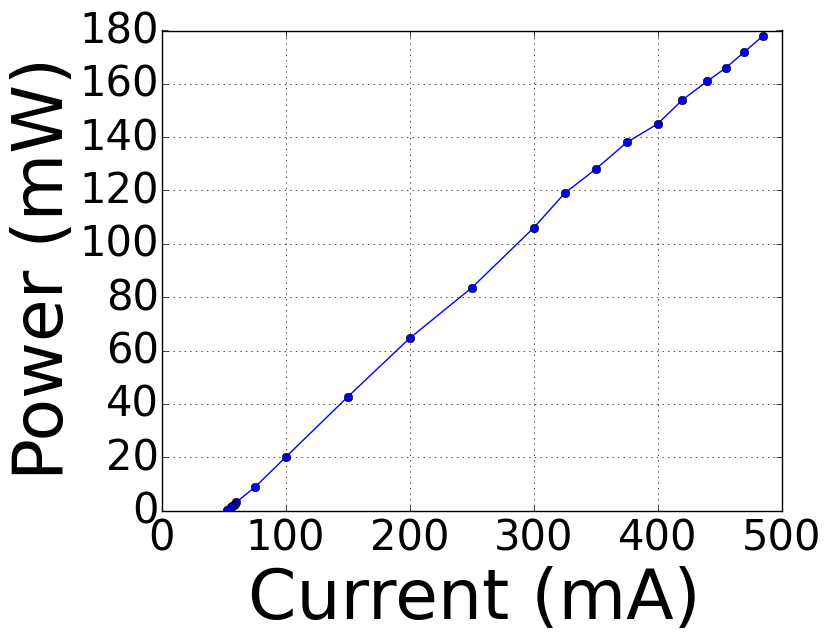

In [6]:
plot(currents, powers, "bo-")
xlim([0, 500])
ylim([0, 180])
xlabel("Current (mA)"; size=50)
ylabel("Power (mW)"; size=50)
for label in [gca()[:get_xticklabels](); gca()[:get_yticklabels]()]
    label[:set_fontsize](30)
end
grid()
savefig("Na_seed_power.png"; bbox_inches="tight")

In [7]:
doubler_power = readcsv("Na_doubler_power.csv");

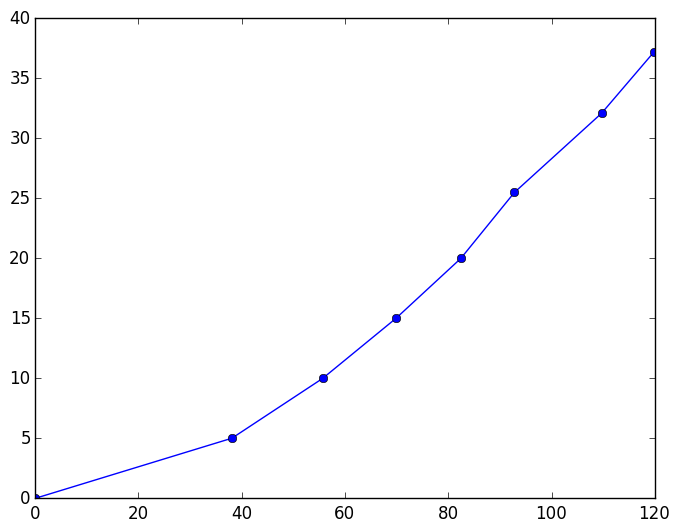

In [8]:
efficiency = 13.5 / 16;
dbl_input = doubler_power[:, 1] * efficiency;
dbl_output = doubler_power[:, 2];
push!(dbl_input, 0)
push!(dbl_output, 0)
plot(dbl_input, dbl_output, "bo-");

In [9]:
model_shg(x, p) = x .* tanh(√(p[1] .* x)).^2

model_shg (generic function with 1 method)

In [10]:
shg_fit = curve_fit(model_shg, dbl_input, dbl_output, [0.02]);
shg_fit.param

1-element Array{Float64,1}:
 0.00342477

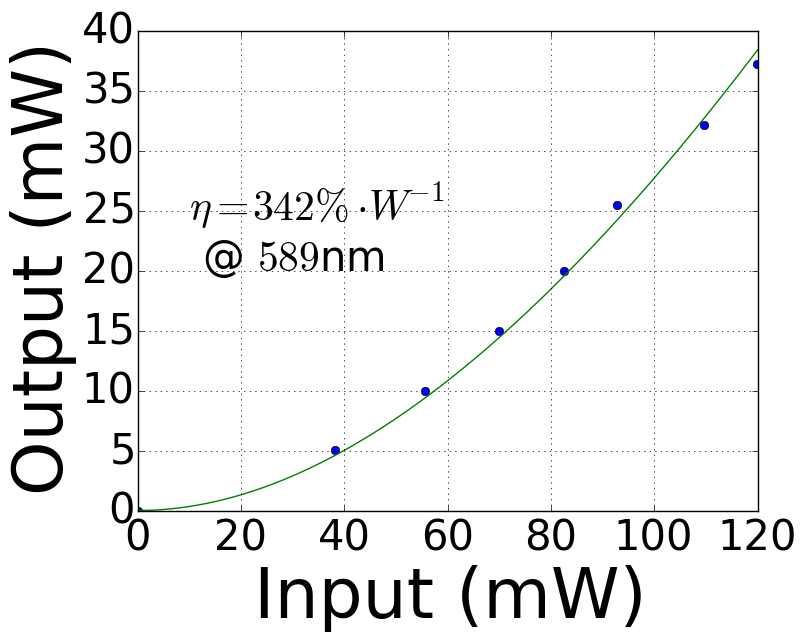

In [11]:
plot(dbl_input, dbl_output, "bo")
plotx = linspace(0, 120, 1000)
plot(plotx, model_shg(plotx, shg_fit.param), "g")

text(10, 20, @sprintf("\$\\eta=%d\\%%\\cdot{W}^{-1}\$\n @ \$589\$nm",
                      round(shg_fit.param[1] * 100000)); size=30)

xlim([0, 120])
ylim([0, 40])
xlabel("Input (mW)"; size=50)
ylabel("Output (mW)"; size=50)
for label in [gca()[:get_xticklabels](); gca()[:get_yticklabels]()]
    label[:set_fontsize](30)
end
grid()
savefig("Na_doubler_power.png"; bbox_inches="tight")